In [20]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Q1: Coin toss

Read section 2.1 of Sivia and recreate figure 2.3.

## (a)

Define the prior functions

In [9]:
def uniform_prior(H):
    if  H > 1 or H < 0:
        return 0
    else:
        return 1
    
first_prior = np.vectorize(uniform_prior)
    
def gaussian_prior(H):
    if  H > 1 or H < 0:
        return 0
    else:
        sigma = 0.03
        mu = 0.5
        return (np.exp(-0.5 * ((H - mu) / sigma) ** 2)) / (np.sqrt(2 * np.pi) * sigma)

second_prior = np.vectorize(gaussian_prior)

def third_prior(H):
    if H > 1 or H < 0:
        return 0
    else:
        return (H - 0.5) ** 10

third_prior = np.vectorize(third_prior)

### Bonus point

Why do we need to use np.vectorize here?

## (b)

Create an array for H, calculte the priors, normalize them and then plot them.

In [10]:
H = np.linspace(0, 1, 1000, dtype = np.float128)

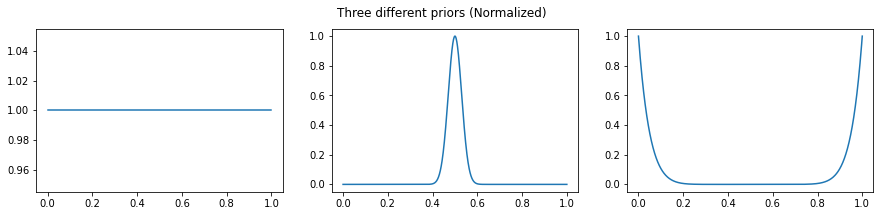

In [11]:
plt.figure(figsize = (15, 3))
plt.suptitle('Three different priors (Normalized)')

prior_1 = first_prior(H)
prior_1 = prior_1 / np.max(prior_1)
plt.subplot(1, 3, 1)
plt.plot(H, prior_1)

prior_2 = second_prior(H)
prior_2 = prior_2 / np.max(prior_2)
plt.subplot(1, 3, 2)
plt.plot(H, prior_2)

prior_3 = third_prior(H)
prior_3 = prior_3 / np.max(prior_3)
plt.subplot(1, 3, 3)
plt.plot(H, prior_3)

plt.show()

## (c)

Here we explicitly declared a data type for the array H. Although most of the times python does it for us, here was an example that we need to do it by hand to avoid round-off error. Find out what this error is and write a few lines about it (In Farsi or English) and explain what did we do to avoid it here. In other words, why did we use 'np.float128' exept just using 'float'?

You can also emit the data type decleration from the definition of H and see what happens in calculating the posterior.

## (d)

Write a proper function to calculate the psterior for a given data and recreate the given plot.

In [12]:
data = [np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size = (i)) for i in range(4)]  
data.extend([np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size = (2 ** i)) for i in range(2, 13)])

In [13]:
def posterior(H, data, prior):
    ones = np.sum(data)
    zeros = len(data) - ones
    return (H ** ones * (1 - H) ** zeros) * prior

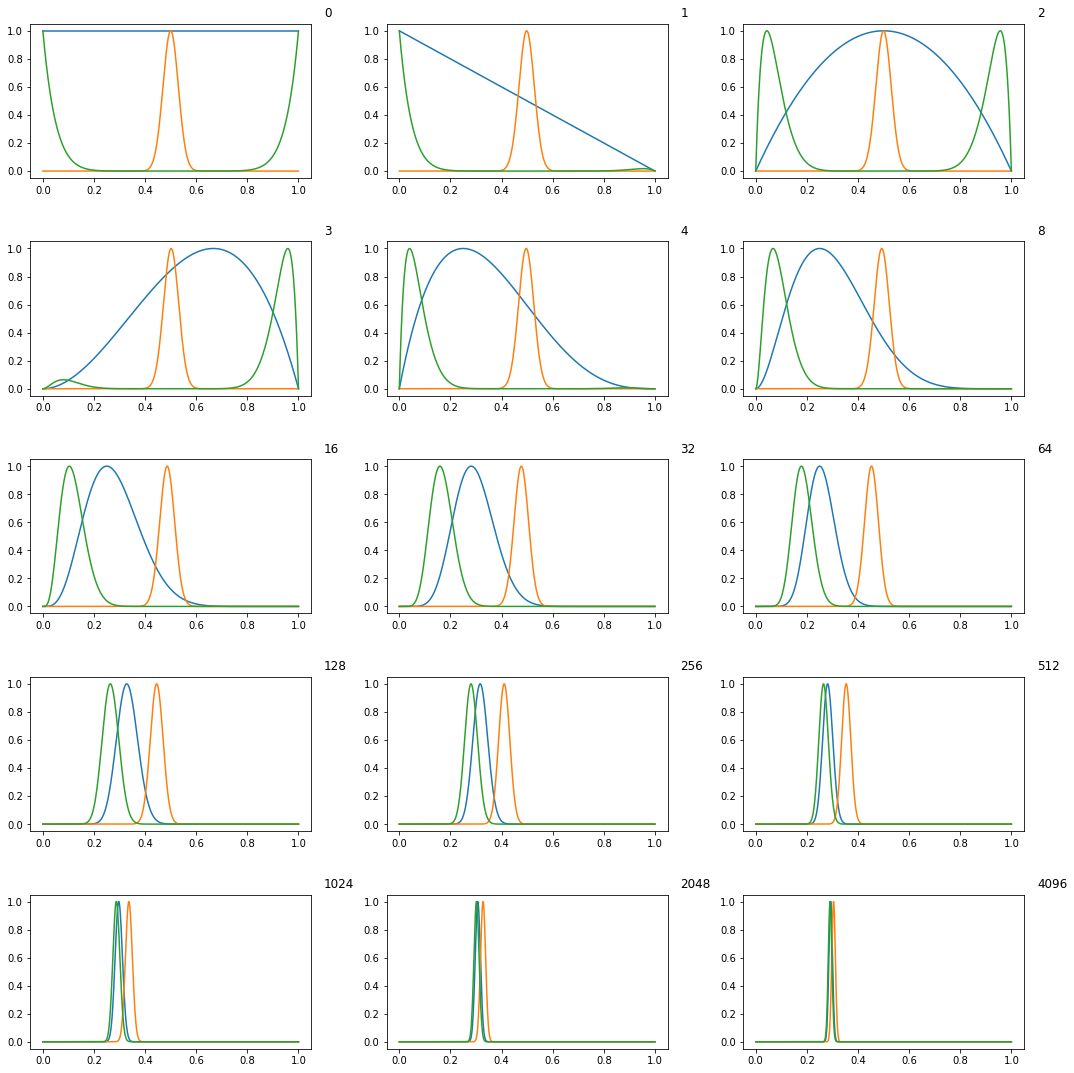

In [20]:
plt.figure(figsize = (15, 15))

for i in range(15):
    plt.subplot(5, 3, i + 1)
    
    post_1 = posterior(H, data[i], prior_1)
    post_1 = post_1 / np.max(post_1)
    plt.plot(H, post_1)
    
    post_2 = posterior(H, data[i], prior_2)
    post_2 = post_2 / np.max(post_2)
    plt.plot(H, post_2)
    
    post_3 = posterior(H, data[i], prior_3)
    post_3 = post_3 / np.max(post_3)
    plt.plot(H, post_3)

    plt.text(1.1 , 1.1, len(data[i]), fontsize = 12)
    
plt.tight_layout(h_pad = 3)
plt.show()

# Q2: Distributions and moments

## (a)

Write a function to calculate raw moments of a given distribution 

In [21]:
def raw_moment(data, n):
    count = 0
    sum_xn = 0
    for x in data:
        sum_xn += x ** n
        count += 1
    return sum_xn / count

## (b)

Write a function to calculate central moments of a given distribution

In [22]:
def central_moment(data, n):
    count = 0
    sum_x = 0
    sum_x_mean_n = 0
    for x in data:
        sum_x += x
        count += 1
    mean_x = sum_x / count
    for x in data:
        sum_x_mean_n += (x - mean_x) ** n
    return sum_x_mean_n / count

## (c)

Using numpy.random, create a binomial (p=0.7, n=$30$), a Poisson ($\mu$ = 2.1) and a gaussian ($\mu$ = 2.1, $\sigma = 0.3$) distribution with size $10^6$ and calculate their first 3 raw and central moments

In [28]:
binomial_dist = np.random.binomial(p = 0.7, n = 30, size = 10 ** 6)
print('Binomial Distribution :\n')
print('The first raw moment : ', raw_moment(binomial_dist, 1))
print('The second raw moment : ', raw_moment(binomial_dist, 2))
print('The third raw moment : ', raw_moment(binomial_dist, 3))
print('\n')
print('The first central moment : ', central_moment(binomial_dist, 1))
print('The second central moment : ', central_moment(binomial_dist, 2))
print('The third central moment : ', central_moment(binomial_dist, 3))

Binomial Distribution :

The first raw moment :  20.997685
The second raw moment :  447.195405
The third raw moment :  1061.929847


The first central moment :  -3.149344962594114e-14
The second central moment :  6.292629640752937
The third central moment :  -2.465118674747084


In [29]:
poisson_dist = np.random.poisson(lam = 2.1, size = 10 ** 6)
print('Poisson Distribution :\n')
print('The first raw moment : ', raw_moment(poisson_dist, 1))
print('The second raw moment : ', raw_moment(poisson_dist, 2))
print('The third raw moment : ', raw_moment(poisson_dist, 3))
print('\n')
print('The first central moment : ', central_moment(poisson_dist, 1))
print('The second central moment : ', central_moment(poisson_dist, 2))
print('The third central moment : ', central_moment(poisson_dist, 3))

Poisson Distribution :

The first raw moment :  2.097114
The second raw moment :  6.493342
The third raw moment :  24.500886


The first central moment :  2.9253595101863538e-15
The second central moment :  2.09545487104353
The third central moment :  2.094792092299653


In [30]:
gaussian_dist = np.random.normal(loc = 2.1, scale = 0.3, size = 10 ** 6)
print('Gaussian Distribution :\n')
print('The first raw moment : ', raw_moment(gaussian_dist, 1))
print('The second raw moment : ', raw_moment(gaussian_dist, 2))
print('The third raw moment : ', raw_moment(gaussian_dist, 3))
print('\n')
print('The first central moment : ', central_moment(gaussian_dist, 1))
print('The second central moment : ', central_moment(gaussian_dist, 2))
print('The third central moment : ', central_moment(gaussian_dist, 3))

Gaussian Distribution :

The first raw moment :  2.0997643448780487
The second raw moment :  4.499068841742903
The third raw moment :  9.825245617948877


The first central moment :  -6.839512023404382e-14
The second central moment :  0.0900585377221796
The third central moment :  5.786598357635999e-05


## (d)

Using scipy.stats, calculate the first three moments of these distributions and check with the results from your own function. What does the function in scipy calculate? Raw moments or central moments?

In [31]:
from scipy import stats

In [33]:
print('Binomial Distribution :\n')
print('The first moment : ', stats.moment(binomial_dist, 1))
print('The second moment : ', stats.moment(binomial_dist, 2))
print('The third moment : ', stats.moment(binomial_dist, 3))

Binomial Distribution :

The first moment :  0.0
The second moment :  6.292629640775001
The third moment :  -2.465118674738222


In [34]:
print('Poisson Distribution :\n')
print('The first moment : ', stats.moment(poisson_dist, 1))
print('The second moment : ', stats.moment(poisson_dist, 2))
print('The third moment : ', stats.moment(poisson_dist, 3))

Poisson Distribution :

The first moment :  0.0
The second moment :  2.0954548710039993
The third moment :  2.0947920923106356


In [35]:
print('Gaussian Distribution :\n')
print('The first moment : ', stats.moment(gaussian_dist, 1))
print('The second moment : ', stats.moment(gaussian_dist, 2))
print('The third moment : ', stats.moment(gaussian_dist, 3))

Gaussian Distribution :

The first moment :  0.0
The second moment :  0.09005853772217724
The third moment :  5.7865983594839314e-05


The scipy.stats.moment calculates central moments !

# Q3: Radioactive decay

The Poisson distribution is often used to describe situations in which an event occurs repeatedly at a constant rate of probability. An application of this distribution involves the decay of radioactive samples, but only in the approximation that the decay rate is slow enough that depletion in the population of the decaying species can be neglected.

Now suppose we have a data set showing the number of $\alpha$ particles emmited in 7.5 sec intervals:

## (a)

Load the provided data into a pandas data frame and show the data and then plot it's PDF.

In [53]:
import pandas as pd

In [54]:
df = pd.read_csv("data.txt", sep = '\t')
df

,# time passed,number of events
0,7.5,232.0
1,15.0,240.0
2,22.5,245.0
3,30.0,226.0
4,37.5,223.0
...,...,...
2043,15330.0,265.0
2044,15337.5,220.0
2045,15345.0,252.0
2046,15352.5,229.0


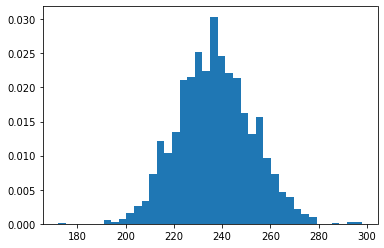

In [55]:
plt.hist(df['number of events'], bins = 40, density = True)
plt.show()

## (b)

Calculate total number of decays and the average number of decays after each time interval. Then add the data to the Pandas DataFrame and show it. Then save the data to file 'new_data.txt'.

In [58]:
new_data = df.copy()
new_data['total number of events'] = new_data['number of events'].rolling(len(new_data), min_periods = 1).sum()
new_data['average number of events'] = new_data['number of events'].rolling(len(new_data), min_periods = 1).mean()
new_data

numpy_array = new_data.to_numpy()
np.savetxt('new_data.txt', numpy_array, fmt = "%d")

## (c)

Use a unifor prior and do the same analysis as question 1 to get the mean decay number per interval. Plot the diagrams as well. (Beware that this time we have a Poisson distribution rather than a binomial one)

## (d)

Use two different priors of your choise and repeat the analysis. Which of these three priors leads to an answer sooner?

## (e)

Now that you have the average decay per time interval, calculate the half life of this radioactive element (Suppose that the sample is large enough not to lose a noticable fraction of the particles in the span of the experiment). Can find out what this element is?

# Bonus question

Do an error analysis and report how sure are you about the number you derived for the half life of the element.